### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df_water = pd.read_csv('water_potability (1).csv')
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Data Cleaning

In [3]:
print('NaN values in Water dataset:')
df_water.isna().sum()

NaN values in Water dataset:


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df_clean = df_water.fillna(df_water.mean())

In [6]:
print('Sum of Null values after cleaning = ', df_clean.isnull().sum().sum())

Sum of Null values after cleaning =  0


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Feature Selection

<Axes: >

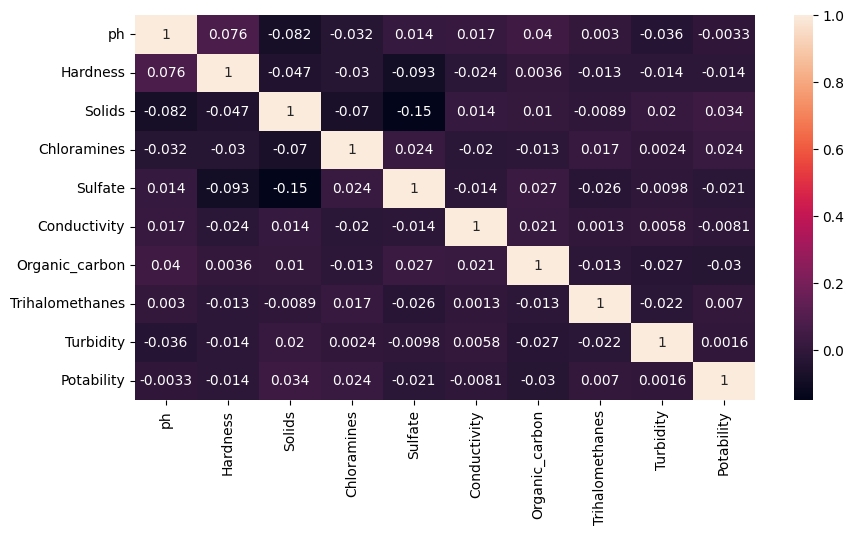

In [8]:
plt.figure(figsize = (10, 5))
sns.heatmap(df_clean.corr(), annot = True)

In [9]:
x = df_clean[list(df_clean.columns)[0: -1]]

In [10]:
y = df_clean['Potability']

### Dala Balancing..?

### Data Splitting

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [12]:
print('No of records in traning data:', x_train.shape[0])
print('No of records in testting data:', x_test.shape[0])

No of records in traning data: 2620
No of records in testting data: 656


### Model Building

Accuracy: 66.77 %


<Axes: >

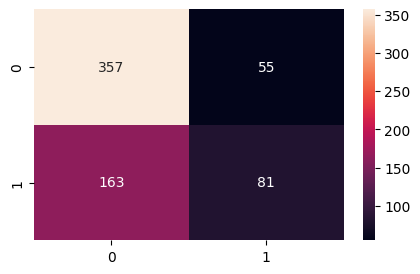

In [34]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
print(f'Accuracy: {round(100 * accuracy_score(y_test, pred2), 2)} %')
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, pred2), annot = True, fmt = '2g')

In [19]:
sample = x_test.loc[1578, :]

In [20]:
sample.shape

(9,)

In [44]:
pred = model.predict([sample])
print(pred)

[0]


C:\Users\kamra\anaconda3\envs\NumPY\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [97]:
pred

array([0])

In [33]:
y_train.value_counts()

Potability
0    1586
1    1034
Name: count, dtype: int64

Accuracy: 63.11 %


<Axes: >

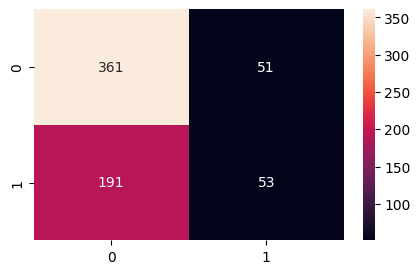

In [42]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(x_train, y_train)
pred4 = model4.predict(x_test)
print(f'Accuracy: {round(100 * accuracy_score(y_test, pred4), 2)} %')
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, pred4), annot = True, fmt = '2g')

### Task-1 Data Balancing
### Save the model and Integrate in Streamlit UI and then Deploy ysing github and Streamlit Cloud.